# LATAM - Case Study for monetization Strategy

> Using attached dummy data, please perform an assessment of this business and prepare a set of meeting materials

> Assume this business earns revenue through advertisements shown on a mobile video content platform

### 1. Imports

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 2. Data Processing

In [4]:
# Load the data
df = pd.read_csv('data/latam_data.csv', parse_dates=['date'])

# Data Cleaning
missing_values = df.isnull().sum()
print("Missing values per column:\n", missing_values)

Missing values per column:
 date                       0
ad_product_category        0
region                     0
ad_placement               0
industry                   0
impressions                0
cpm                    54516
customer_id                0
account_id              1458
revenue                54516
dtype: int64


<Axes: xlabel='date'>

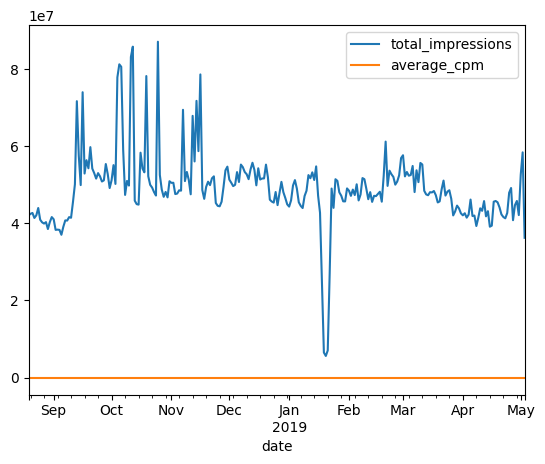

In [12]:
df.groupby('date').agg(
    # total_rows=pd.NamedAgg(column='account_id', aggfunc='count'),
    # total_impressions=pd.NamedAgg(column='impressions', aggfunc='sum'),
    average_cpm=pd.NamedAgg(column='cpm', aggfunc='mean'),
    # total_revenue=pd.NamedAgg(column='revenue', aggfunc='sum')
).plot()


In [ ]:

# Descriptive Statistics
print("Descriptive statistics for numeric fields:\n", df[['Impressions', 'CPM']].describe())

# Revenue Calculation
df['Revenue'] = (df['Impressions'] / 1000) * df['CPM']

# Time Series Analysis: Trend over time
df.set_index('Date', inplace=True)
daily_revenue = df['Revenue'].resample('D').sum()
daily_revenue.plot(title='Daily Revenue Trend', figsize=(10, 5))
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.show()

# Grouping by Region and Category
grouped = df.groupby(['Region', 'Ad Product Category']).agg(
    total_impressions=pd.NamedAgg(column='Impressions', aggfunc='sum'),
    average_cpm=pd.NamedAgg(column='CPM', aggfunc='mean'),
    total_revenue=pd.NamedAgg(column='Revenue', aggfunc='sum')
).reset_index()
print(grouped.head())